In [135]:
import pandas as pd
import random
import os
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [136]:
train_path = "/content/drive/MyDrive/해커톤_데이터/card_train (1).csv"
test_path =  "/content/drive/MyDrive/해커톤_데이터/card_test.csv"

In [137]:
train_df = pd.read_csv(train_path)
y_train = train_df['Segment']
train_df

,Unnamed: 0.1,대표결제일,대표결제방법코드,대표청구지고객주소구분코드,대표청구서수령지구분코드,청구서수령방법,청구서발송여부_B0,청구서발송여부_R3M,청구서발송여부_R6M,청구금액_B0,...,컨택건수_CA_청구서_R6M,컨택건수_이용유도_청구서_R6M,컨택건수_이용유도_인터넷_R6M,컨택건수_이용유도_당사앱_R6M,컨택건수_채권_B0M,컨택건수_채권_R6M,캠페인접촉건수_R12M,캠페인접촉일수_R12M,ID,Segment.1
0,61865,1,자동이체,주거지,우편,우편,1,1,1,466,...,0,5,5,0,0,0,1회 이상,1일 이상,TRAIN_000389,E
1,8547,13,자동이체,미확인,이메일,이메일,1,1,1,2417,...,0,4,6,0,0,0,1회 이상,1일 이상,TRAIN_304152,D
2,43497,25,자동이체,주거지,우편,우편,0,0,0,0,...,2,4,2,0,0,0,5회 이상,5일 이상,TRAIN_356239,E
3,40785,25,자동이체,주거지,우편,우편,1,1,1,5931,...,0,0,0,0,0,0,1회 이상,1일 이상,TRAIN_122432,E
4,18999,25,자동이체,주거지,우편,우편,1,1,1,684,...,2,0,0,0,0,0,10회 이상,10일 이상,TRAIN_285200,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70555,40610,20,자동이체,회사,우편,우편,1,1,1,958,...,0,0,4,0,0,0,5회 이상,5일 이상,TRAIN_194015,E
70556,2629,27,자동이체,주거지,우편,우편,1,1,1,19187,...,0,1,0,0,0,3,1회 이상,1일 이상,TRAIN_286464,C
70557,65345,12,자동이체,주거지,우편,우편,1,1,1,4788,...,2,0,0,0,0,0,20회 이상,20일 이상,TRAIN_069189,E
70558,69023,23,자동이체,미확인,이메일,이메일,1,1,1,17,...,0,2,0,0,0,0,10회 이상,10일 이상,TRAIN_170116,E


In [138]:
for i in train_df.columns:
    print(i)

Unnamed: 0.1
대표결제일
대표결제방법코드
대표청구지고객주소구분코드
대표청구서수령지구분코드
청구서수령방법
청구서발송여부_B0
청구서발송여부_R3M
청구서발송여부_R6M
청구금액_B0
청구금액_R3M
청구금액_R6M
포인트_마일리지_건별_B0M
포인트_마일리지_건별_R3M
포인트_포인트_건별_B0M
포인트_포인트_건별_R3M
포인트_마일리지_월적립_B0M
포인트_마일리지_월적립_R3M
포인트_포인트_월적립_B0M
포인트_포인트_월적립_R3M
포인트_적립포인트_R12M
포인트_적립포인트_R3M
포인트_이용포인트_R12M
포인트_이용포인트_R3M
포인트_잔여포인트_B0M
마일_적립포인트_R12M
마일_적립포인트_R3M
마일_이용포인트_R12M
마일_이용포인트_R3M
마일_잔여포인트_B0M
할인건수_R3M
할인금액_R3M
할인건수_B0M
할인금액_B0M
할인금액_청구서_R3M
할인금액_청구서_B0M
상환개월수_결제일_R6M
상환개월수_결제일_R3M
선결제건수_R6M
선결제건수_R3M
연체건수_R6M
연체건수_R3M
혜택수혜금액_R3M
포인트_마일리지_환산_B0M
혜택수혜금액
최초한도금액
카드이용한도금액
CA한도금액
일시상환론한도금액
월상환론한도금액
CA이자율_할인전
CL이자율_할인전
RV일시불이자율_할인전
RV현금서비스이자율_할인전
RV신청일자
RV약정청구율
RV최소결제비율
자발한도감액횟수_R12M
자발한도감액금액_R12M
자발한도감액후경과월
강제한도감액횟수_R12M
강제한도감액금액_R12M
강제한도감액후경과월
한도증액횟수_R12M
한도증액금액_R12M
한도증액후경과월
상향가능한도금액
상향가능CA한도금액
카드론동의여부
월상환론상향가능한도금액
RV전환가능여부
일시불ONLY전환가능여부
카드이용한도금액_B1M
카드이용한도금액_B2M
특별한도보유여부_R3M
연체감액여부_R3M
한도심사요청건수
한도요청거절건수
한도심사요청후경과월
한도심사거절후경과월
시장단기연체여부_R6M
rv최초시작후경과일
증감율_이용건수_신용_전월
증감율_이용건수_신판_전월
증감율_이용건수_일시불_전

In [139]:
recommended_columns = [
    # 고객 기본 정보
    "남녀구분코드", "연령", "Life_Stage", "입회경과개월수_신용", "최종카드발급경과월",
    "회원여부_이용가능", "회원여부_연체",

    # 카드 보유 상태 및 사용 가능 정보
    "소지카드수_유효_신용", "소지카드수_이용가능_신용",
    "유효카드수_신용체크", "유효카드수_체크",
    "이용가능카드수_신용", "이용가능카드수_체크",
    "최종이용일자_신판", "이용후경과월_신판",

    # 이용 행태 관련
    "이용건수_일시불_R3M", "이용건수_할부_R3M", "이용건수_CA_R3M",
    "이용금액_일시불_R3M", "이용금액_할부_R3M", "이용금액_CA_R3M",
    "이용금액_온라인_R3M", "이용금액_오프라인_R3M",
    "잔액_일시불_B0M", "잔액_카드론_B0M",
    "평잔_일시불_3M", "평잔_CA_3M", "월중평잔_일시불_B0M", "월중평잔_CA_B0M",

    # 연체 및 상환
    "연체건수_R3M", "연체일수_최근", "연체원금_최근",
    "상환개월수_결제일_R3M", "선결제건수_R3M",

    # 포인트 / 마일리지 / 혜택
    "포인트_적립포인트_R3M", "포인트_이용포인트_R3M",
    "포인트_잔여포인트_B0M", "마일_잔여포인트_B0M",
    "혜택수혜금액_R3M",

    # 마케팅 및 컨택 이력
    "수신거부여부_TM", "수신거부여부_SMS", "마케팅동의여부",
    "컨택건수_이용유도_TM_R6M", "컨택건수_카드론_LMS_R6M", "캠페인접촉건수_R12M",

    # 업종별 소비 패턴
    "쇼핑_온라인_이용금액", "교통_주유이용금액", "여유_숙박이용금액", "납부_통신비이용금액",
    "_1순위업종", "_1순위쇼핑업종", "_1순위교통업종", "_1순위여유업종",

    # 이용 트렌드 및 한도 소진률
    "증감율_이용건수_신용_전월", "증감율_이용금액_신용_전월",
    "잔액_신판평균한도소진율_r3m", "변동률_일시불평잔"
]

In [140]:
X = train_df[recommended_columns]
X

,남녀구분코드,연령,Life_Stage,입회경과개월수_신용,최종카드발급경과월,회원여부_이용가능,회원여부_연체,소지카드수_유효_신용,소지카드수_이용가능_신용,유효카드수_신용체크,...,여유_숙박이용금액,납부_통신비이용금액,_1순위업종,_1순위쇼핑업종,_1순위교통업종,_1순위여유업종,증감율_이용건수_신용_전월,증감율_이용금액_신용_전월,잔액_신판평균한도소진율_r3m,변동률_일시불평잔
0,2,60대,노년생활,39,6,1,0,1,1,1,...,0,0,쇼핑,마트,NaN,NaN,-0.042449,0.205550,0.000000,0.994870
1,1,30대,가족구축기,39,49,1,0,1,1,1,...,0,1161,교통,온라인,주유,NaN,-0.254263,0.158885,0.096989,1.042913
2,2,50대,자녀성장(2),172,26,1,0,2,2,3,...,0,0,NaN,NaN,NaN,NaN,0.000000,0.000035,0.000000,0.000000
3,2,60대,노년생활,202,22,1,0,1,1,1,...,0,0,쇼핑,마트,주유,운동,-0.002189,0.274664,0.166661,0.846899
4,2,30대,자녀성장(1),3,14,1,0,1,1,2,...,0,0,납부,NaN,NaN,NaN,-0.122855,-0.842909,0.219120,1.049207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70555,1,40대,자녀성장(1),11,17,1,0,1,1,1,...,0,1227,납부,마트,택시,공연,-0.001844,0.236206,0.000000,0.710065
70556,1,50대,자녀성장(2),278,52,1,0,1,1,1,...,0,0,교통,도소매,주유,NaN,-0.143871,-0.300704,0.000000,0.805747
70557,2,60대,자녀독립기,191,13,1,0,2,2,3,...,0,0,쇼핑,도소매,버스지하철,NaN,-0.091708,0.287370,0.335423,0.812122
70558,2,50대,자녀독립기,105,13,1,0,1,1,1,...,0,0,납부,NaN,NaN,NaN,0.000000,0.000027,0.000000,0.688786


In [141]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70560 entries, 0 to 70559
Data columns (total 57 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   남녀구분코드            70560 non-null  int64  
 1   연령                70560 non-null  object 
 2   Life_Stage        70560 non-null  object 
 3   입회경과개월수_신용        70560 non-null  int64  
 4   최종카드발급경과월         70560 non-null  int64  
 5   회원여부_이용가능         70560 non-null  int64  
 6   회원여부_연체           70560 non-null  int64  
 7   소지카드수_유효_신용       70560 non-null  int64  
 8   소지카드수_이용가능_신용     70560 non-null  int64  
 9   유효카드수_신용체크        70560 non-null  int64  
 10  유효카드수_체크          70560 non-null  int64  
 11  이용가능카드수_신용        70560 non-null  int64  
 12  이용가능카드수_체크        70560 non-null  int64  
 13  최종이용일자_신판         70560 non-null  int64  
 14  이용후경과월_신판         70560 non-null  int64  
 15  이용건수_일시불_R3M      70560 non-null  int64  
 16  이용건수_할부_R3M       70560 non-null  int64 

In [142]:
oj_columns = [x for x in X.columns if X[x].dtype == "object"]
oj_columns

['연령',
 'Life_Stage',
 '캠페인접촉건수_R12M',
 '_1순위업종',
 '_1순위쇼핑업종',
 '_1순위교통업종',
 '_1순위여유업종']

In [143]:
from sklearn.preprocessing import LabelEncoder

#전처리 함수
def preprocessing(df):
    oj_columns = [x for x in df.columns if df[x].dtype == "object"]
    for cate in oj_columns:
        le = LabelEncoder()
        df[cate] = le.fit_transform(df[cate])

    return df

In [144]:
x_train = preprocessing(X)
x_train

<ipython-input-143-645da71254c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cate] = le.fit_transform(df[cate])
<ipython-input-143-645da71254c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cate] = le.fit_transform(df[cate])
<ipython-input-143-645da71254c1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

,남녀구분코드,연령,Life_Stage,입회경과개월수_신용,최종카드발급경과월,회원여부_이용가능,회원여부_연체,소지카드수_유효_신용,소지카드수_이용가능_신용,유효카드수_신용체크,...,여유_숙박이용금액,납부_통신비이용금액,_1순위업종,_1순위쇼핑업종,_1순위교통업종,_1순위여유업종,증감율_이용건수_신용_전월,증감율_이용금액_신용_전월,잔액_신판평균한도소진율_r3m,변동률_일시불평잔
0,2,4,1,39,6,1,0,1,1,1,...,0,0,4,1,5,7,-0.042449,0.205550,0.000000,0.994870
1,1,1,0,39,49,1,0,1,1,1,...,0,1161,1,6,2,7,-0.254263,0.158885,0.096989,1.042913
2,2,3,5,172,26,1,0,2,2,3,...,0,0,9,8,5,7,0.000000,0.000035,0.000000,0.000000
3,2,4,1,202,22,1,0,1,1,1,...,0,0,4,1,2,5,-0.002189,0.274664,0.166661,0.846899
4,2,1,4,3,14,1,0,1,1,2,...,0,0,2,8,5,7,-0.122855,-0.842909,0.219120,1.049207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70555,1,2,4,11,17,1,0,1,1,1,...,0,1227,2,1,4,1,-0.001844,0.236206,0.000000,0.710065
70556,1,3,5,278,52,1,0,1,1,1,...,0,0,1,0,2,7,-0.143871,-0.300704,0.000000,0.805747
70557,2,4,3,191,13,1,0,2,2,3,...,0,0,4,0,0,7,-0.091708,0.287370,0.335423,0.812122
70558,2,3,3,105,13,1,0,1,1,1,...,0,0,2,8,5,7,0.000000,0.000027,0.000000,0.688786


In [145]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70560 entries, 0 to 70559
Data columns (total 57 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   남녀구분코드            70560 non-null  int64  
 1   연령                70560 non-null  int64  
 2   Life_Stage        70560 non-null  int64  
 3   입회경과개월수_신용        70560 non-null  int64  
 4   최종카드발급경과월         70560 non-null  int64  
 5   회원여부_이용가능         70560 non-null  int64  
 6   회원여부_연체           70560 non-null  int64  
 7   소지카드수_유효_신용       70560 non-null  int64  
 8   소지카드수_이용가능_신용     70560 non-null  int64  
 9   유효카드수_신용체크        70560 non-null  int64  
 10  유효카드수_체크          70560 non-null  int64  
 11  이용가능카드수_신용        70560 non-null  int64  
 12  이용가능카드수_체크        70560 non-null  int64  
 13  최종이용일자_신판         70560 non-null  int64  
 14  이용후경과월_신판         70560 non-null  int64  
 15  이용건수_일시불_R3M      70560 non-null  int64  
 16  이용건수_할부_R3M       70560 non-null  int64 

In [146]:
y_train

,Segment
0,E
1,D
2,E
3,E
4,E
...,...
70555,E
70556,C
70557,E
70558,E


##모델 학습 및 앙상블 예측

In [122]:
!pip install xgboost lightgbm catboost scikit-learn

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [148]:
X = x_train
y = y_train

In [149]:
y

,Segment
0,E
1,D
2,E
3,E
4,E
...,...
70555,E
70556,C
70557,E
70558,E


In [150]:
from sklearn.preprocessing import LabelEncoder

y = LabelEncoder().fit_transform(y)

In [151]:
#불균형 확인

y = pd.Series(y)

print(y.value_counts())
print(y.value_counts(normalize=True))

4    56505
3    10270
2     3753
0       28
1        4
Name: count, dtype: int64
4    0.800808
3    0.145550
2    0.053189
0    0.000397
1    0.000057
Name: proportion, dtype: float64


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


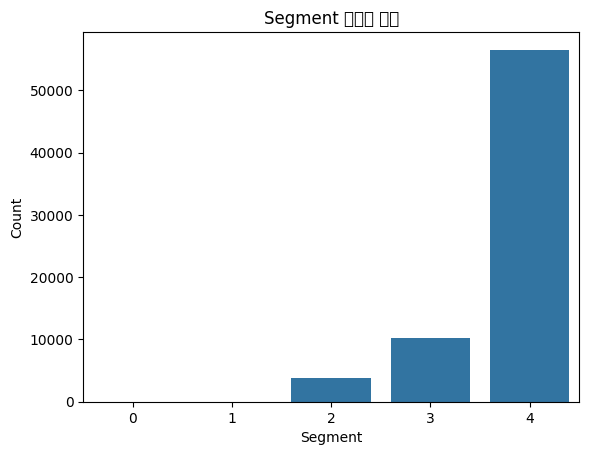

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y)
plt.title("Segment 클래스 분포")
plt.xlabel("Segment")
plt.ylabel("Count")
plt.show()

In [153]:
print(y.value_counts())

4    56505
3    10270
2     3753
0       28
1        4
Name: count, dtype: int64


In [154]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70560 entries, 0 to 70559
Data columns (total 57 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   남녀구분코드            70560 non-null  int64  
 1   연령                70560 non-null  int64  
 2   Life_Stage        70560 non-null  int64  
 3   입회경과개월수_신용        70560 non-null  int64  
 4   최종카드발급경과월         70560 non-null  int64  
 5   회원여부_이용가능         70560 non-null  int64  
 6   회원여부_연체           70560 non-null  int64  
 7   소지카드수_유효_신용       70560 non-null  int64  
 8   소지카드수_이용가능_신용     70560 non-null  int64  
 9   유효카드수_신용체크        70560 non-null  int64  
 10  유효카드수_체크          70560 non-null  int64  
 11  이용가능카드수_신용        70560 non-null  int64  
 12  이용가능카드수_체크        70560 non-null  int64  
 13  최종이용일자_신판         70560 non-null  int64  
 14  이용후경과월_신판         70560 non-null  int64  
 15  이용건수_일시불_R3M      70560 non-null  int64  
 16  이용건수_할부_R3M       70560 non-null  int64 

##SMOTE + RandomOverSampler 조합

In [156]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from collections import Counter
import pandas as pd

# 1. SMOTE로 클래스 2, 3 보완
smote = SMOTE(
    sampling_strategy={2: 40000, 3: 40000},  # 원하는 수치로 증강
    random_state=42
)
X_sm, y_sm = smote.fit_resample(X, y)

# 2. RandomOverSampler로 클래스 0, 1 복제
ros = RandomOverSampler(
    sampling_strategy={0: 35000, 1: 30000},  # 최소 1,000개로 맞춤
    random_state=42
)
X_resampled, y_resampled = ros.fit_resample(X_sm, y_sm)

# 확인
print("클래스 분포:")
print(pd.Series(y_resampled).value_counts())


클래스 분포:
4    56505
3    40000
2    40000
0    35000
1    30000
Name: count, dtype: int64


In [132]:
X.shape

(70560, 57)

In [157]:
y.shape

(70560,)

<ipython-input-112-13357fc5814d>:16: UserWarning: Glyph 54812 (\N{HANGUL SYLLABLE HYE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-112-13357fc5814d>:16: UserWarning: Glyph 53469 (\N{HANGUL SYLLABLE TAEG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-112-13357fc5814d>:16: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-112-13357fc5814d>:16: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-112-13357fc5814d>:16: UserWarning: Glyph 52972 (\N{HANGUL SYLLABLE KEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-112-13357fc5814d>:16: UserWarning: Glyph 47100 (\N{HANGUL SYLLABLE REOM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-112-13357fc5814d>:16: UserWarning: Glyph 47749 (\N{HANGUL SYLLABLE MYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_lay

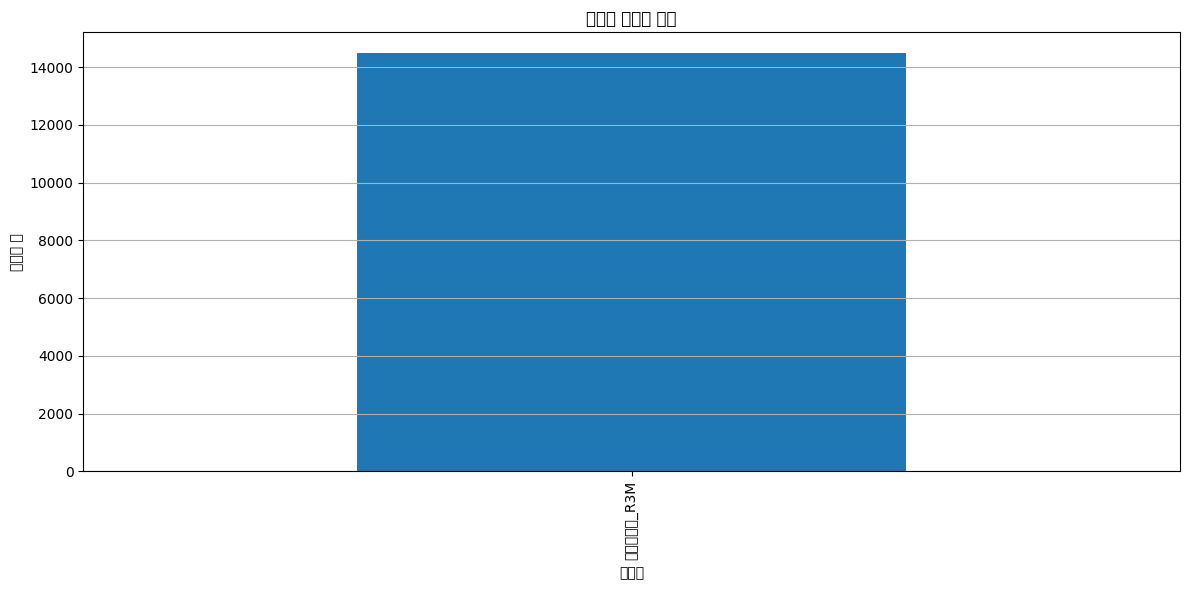

In [114]:
missing_columns = X.columns[X.isnull().any()].tolist()
print("결측치가 있는 컬럼 수:", len(missing_columns))
print("결측치 포함 컬럼 목록:")
print(missing_columns)


결측치가 있는 컬럼 수: 1
결측치 포함 컬럼 목록:
['혜택수혜율_R3M']


##하이퍼파라미터 튜닝 및 앙상블

In [162]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, f1_score, classification_report
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import numpy as np

# 1. 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)

# 2. F1 scorer 정의
f1_macro = make_scorer(f1_score, average='macro')

# 3. XGBoost 튜닝
param_xgb = {
    'n_estimators': [100, 300],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1]
}
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
grid_xgb = GridSearchCV(xgb, param_xgb, scoring=f1_macro, cv=3, n_jobs=-1)
grid_xgb.fit(X_train, y_train)
best_xgb = grid_xgb.best_estimator_

# 4. LightGBM 튜닝
param_lgb = {
    'n_estimators': [100, 300],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1]
}
lgb = LGBMClassifier(random_state=42)
grid_lgb = GridSearchCV(lgb, param_lgb, scoring=f1_macro, cv=3, n_jobs=-1)
grid_lgb.fit(X_train, y_train)
best_lgb = grid_lgb.best_estimator_

# 5. CatBoost 기본 (튜닝은 선택)
cat = CatBoostClassifier(n_estimators=100, random_state=42, verbose=0)
cat.fit(X_train, y_train)

# 6. soft voting 예측
xgb_proba = best_xgb.predict_proba(X_val)
lgb_proba = best_lgb.predict_proba(X_val)
cat_proba = cat.predict_proba(X_val)

ensemble_proba = (xgb_proba + lgb_proba + cat_proba) / 3
ensemble_pred = np.argmax(ensemble_proba, axis=1)

# 7. 평가
print("F1 Score (macro):", f1_score(y_val, ensemble_pred, average='macro'))
print("F1 Score (weighted):", f1_score(y_val, ensemble_pred, average='weighted'))
print("\n📊 Classification Report:")
print(classification_report(y_val, ensemble_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:09:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.081981 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7000
[LightGBM] [Info] Number of data points in the train set: 161204, number of used features: 57
[LightGBM] [Info] Start training from score -1.750466
[LightGBM] [Info] Start training from score -1.904617
[LightGBM] [Info] Start training from score -1.616935
[LightGBM] [Info] Start training from score -1.616935
[LightGBM] [Info] Start training from score -1.271485
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[